# Лабораторная работа 4. Разведочный анализ данных

## Часть 1. Описательный анализ.

Во второй части лабораторной продолжим работать с файлом `cardio_train.csv`. 
Набор данных **Cardiovascular Disease dataset** содержит следующую информацию о пациентах:
- age (возраст, в днях)
- height (рост, в см.)
- weight (вес, в кг.)
- gender (пол)
- ap_hi (систолическое давление)
- ap_lo (диастолическое давление)
- cholesterol  (уровень холестерина:  1: нормальный, 2: повышенный, 3: очень высокий)
- gluc (уровень глюкозы: 1: нормальный, 2: повышенный, 3: очень высокий)
- smoke(курение)
- alco (употребление алкоголя)
- active (физическая активность)
- cardio (отсутствие или наличие ССЗ)


In [2]:
# подключаем необходимые библиотеки
import pandas as pd
import numpy as np

# Часть 2. Визуальный анализ данных

Библиотека `matplotlib` - источник основных инструментов научной графики в `Python`
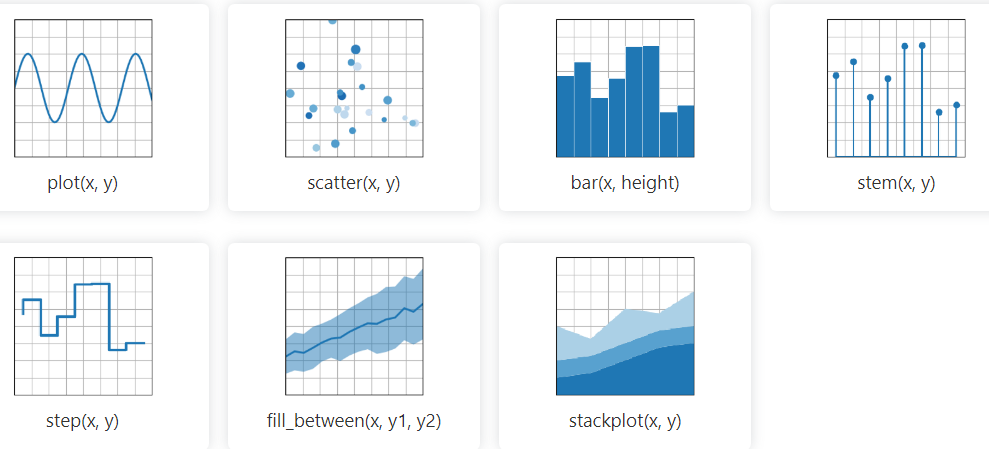

При выполнении заданий рекомендуется обращаться:
- [к документации по matplotlib](https://matplotlib.org/)
- к электронному учебнику П. Шабанова [ Научная графика в Python](https://github.com/whitehorn/Scientific_graphics_in_python)

## Графика в Pyplot
Интерфейс `pyplot` позволяет пользователю сосредоточиться на выборе готовых решений и настройке базовых параметров рисунка. Это его главное достоинство, поэтому изучение `matplotlib` лучше всего начинать именно с интерфейса `pyplot`.

Существует де-факто стандарт подключения pyplot:

`import matplotlib.pyplot as plt`

Пакет `matplotlib` может выводить графики на экран разными способами (использовать различные backend-ы). Например, можно выводить графики в отдельном окне или внутри блокнота Jupyter. 

Мы будем пользоваться вторым способом. Для этого перед подключение библиотеки нужно воспользоваться командой `%matplotlib inline`. 

После создания графика для того, чтобы отобразить его результат, нужно выполнить команду `plt.show()`.

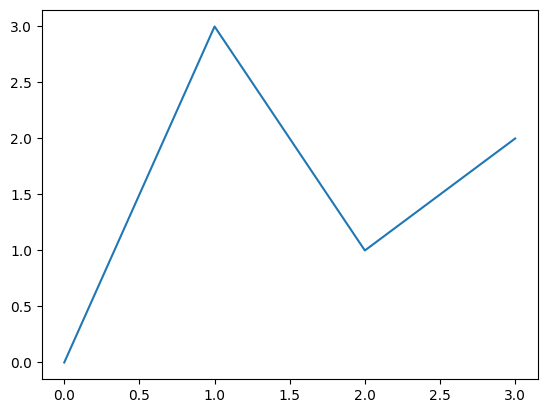

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()

Графики в `matplotlib` удобно организовывать внутри объекта `Figure`. Это контейнер самого верхнего уровня, та область на которой все нарисовано. Внутри `Figure` может быть расположено несколько контейнеров `Axes` (область рисования) - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.).  Подробнее про размещение графиков внутри контейнеров здесь - https://pyprog.pro/mpl/mpl_main_components.html

Размещение нескольких графиков на одном рисунке можно организовать несколькими способами:
- **Метод add_subplot()** 
разбивает `Figure` на указанное количество строк и столбцов. После такого разбиения `Figure` можно представить как таблицу (или координатную сетку). Затем область `Axes` помещается в указанную ячейку. Для всего этого `add_subplot()` необходимо всего три числа, которые мы и передаем ему в качестве параметров:
    - первое - количество строк;
    - второе - количество столбцов
    - третье - индекс ячейки.

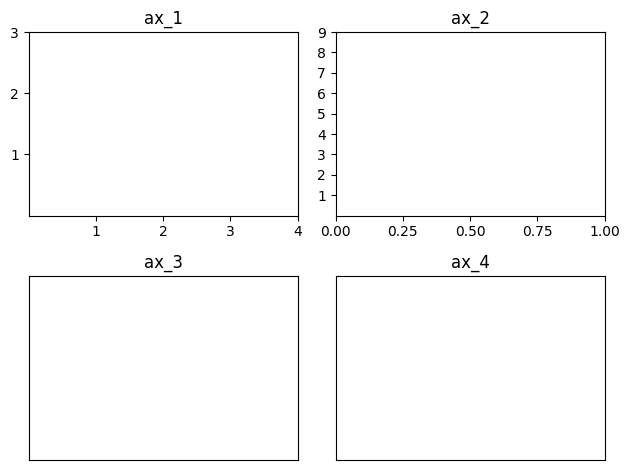

In [4]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

# подписи по осям определим несколькими способами
ax_1.set(title = 'ax_1', xticks=[1,2,3,4], yticks=[1,2,3])
ax_2.set(title = 'ax_2', xticks=np.linspace(0,1,5), yticks=np.arange(1,10))
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

fig.tight_layout() # добавляет пространство между областями Axes

plt.show()

- **Метод plt.subplots(nrows, ncols)**
создает кортеж из двух элементов:

1. Область Figure;
2. Массив объектов NumPy, состоящий из двух строк и двух столбцов. Каждый элемент этого массива представляет собой отдельную область Axes, к которой можно обратиться по ее индексу в данном массиве.

Для дальнейшей работы с данными областями нам необходимо распаковать данный кортеж, что делается следующим образом:

`fig, axes = plt.subplots(nrows , ncols)`

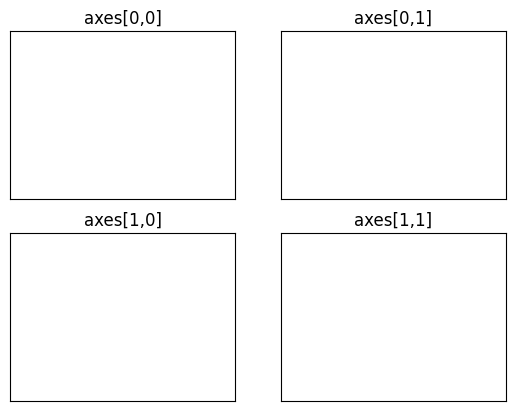

In [5]:
fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
plt.show()

Для быстрого создание Figure с одной областью Axes количество строк и столбцов указывать не нужно - по умолчанию создается 1 строка и 1 столбец

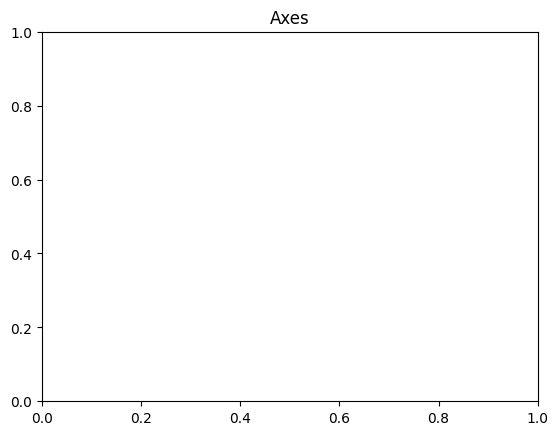

In [6]:
fig, ax = plt.subplots()       #  одна строка вместо двух:
                               #  fig = plt.figure()
                               #  ax = fig.add_subplot(111)
ax.set(title='Axes')
    
plt.show()

### Линейный график Plot()

Аргументами метода `plot(x,y, artists)` являются массивы координат `x`, `y`, а также необязательная строка `artists`, в которой закодированы цвет и стиль линии. Подробнее о стилях, а также про создание подписей, легенды и сохранении в файл см. `учебник Маккини, стр. 278-287`

Рассмотрим примеры:

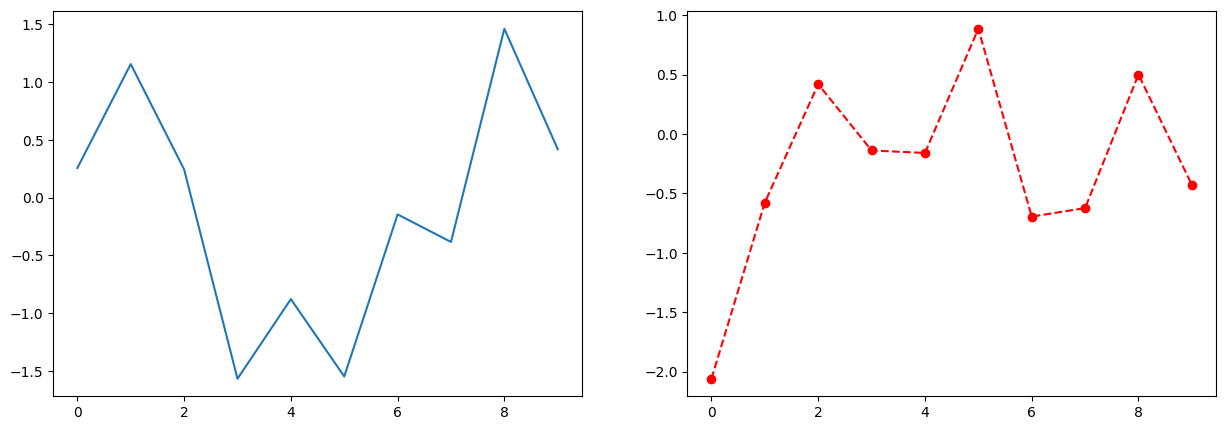

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].plot(np.arange(0,10), np.random.randn(10))
    # координаты х - это последовательность 0,1,2..,9
    # координаты y - это сгерерированные по нормальному закону случайные числа
    # цвет по умолчанию - синий, тип линии по умолчанию - сплошная линия
ax[1].plot(np.arange(0,10), np.random.randn(10), color='r',linestyle='dashed', marker='o' )    
    # цвет  может быть обозначен буквой ('r','g',...), а можно использовать RGB значение, например '#CECECE' 
    # типы линии: 'dashed', 'dotted', 'dashdot', ...
    # маркеры: 'o', '*', '^', 'D', ...
plt.show()

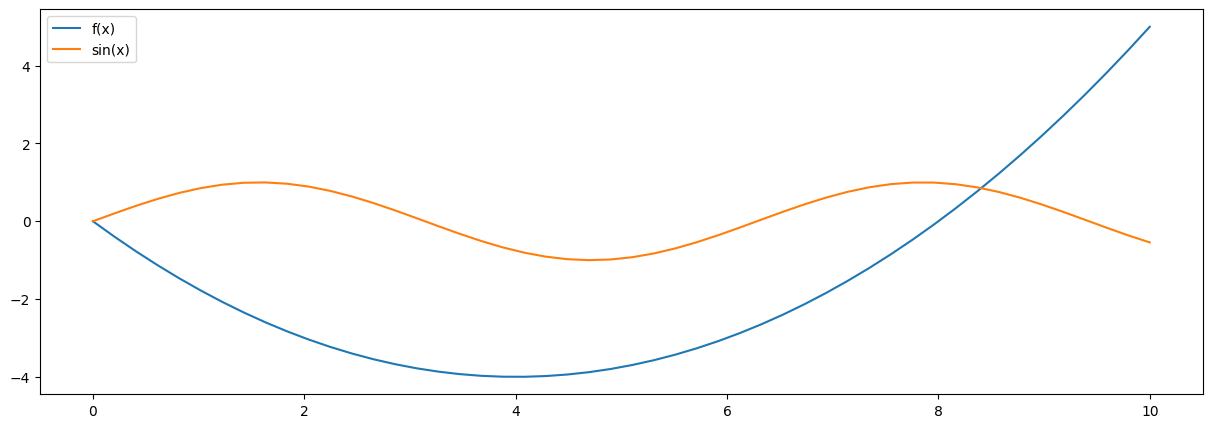

In [8]:
def f(t):
    return(0.25*t**2-2*t)

x=np.linspace(0,10,50)

# на данном рисунке в качестве y используется функция от х, 
# два графика строятся на одном риcунке, добавляется легенда
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, f(x), label='f(x)')
ax.plot(x, np.sin(x), label='sin(x)')
ax.legend()
plt.show()

### Диаграмма рассеяния Scatter()

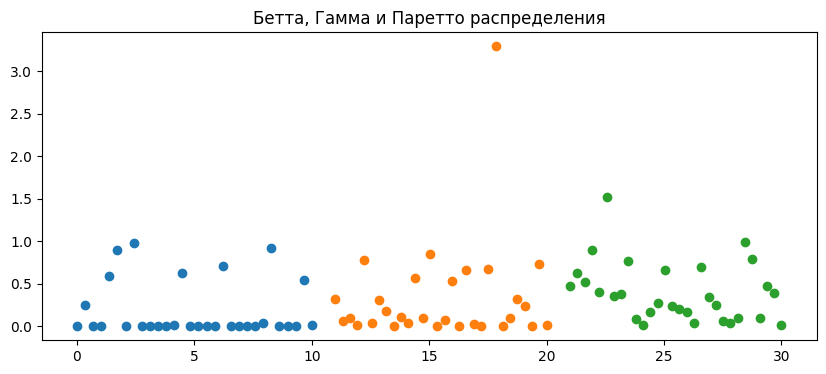

In [9]:
fig, ax = plt.subplots(figsize=(10,4))

x1 = np.linspace(0, 10, 30)
y1 = np.random.beta(0.1, 0.6, size = 30)
x2 = np.linspace(11, 20, 30)
y2 = np.random.gamma(shape = 0.3, scale = 1.1, size = 30)
x3 = np.linspace(21, 30, 30)
y3 = np.random.pareto(3.5, size = 30)

#  Данные в виде точек:
ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3)

ax.set(title='Бетта, Гамма и Паретто распределения')
plt.show()

### Столбчатая диаграмма Bar()

На диаграмме ниже изображены:
1. Один ряд данных
2. Два ряда данных с наложением (чтобы столбики одного ряда данных полностью не заслоняли столбики другого ряда данных, их делают прозрачными)
3. Два ряда данных со смещением


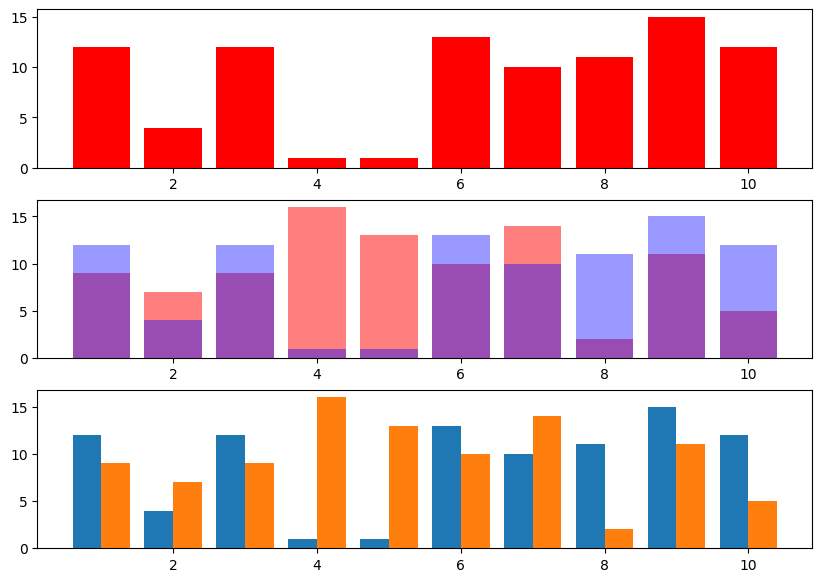

In [10]:
x1 = np.arange(1, 11)
y1 = np.random.randint(1, 20, size = 10)
x2 = np.arange(1, 11)
y2 = np.random.randint(1, 20, size = 10)

fig, axes = plt.subplots(3, 1, figsize=(10,7))

axes[0].bar(x1, y1, color='r')

#  Задаем параметр прозрачности alpha меньше 1:
axes[1].bar(x2, y2, color='r', alpha=0.5)
axes[1].bar(x1, y1, color='b', alpha=0.4)


#  Задаем смещение по оси абсцисс, равное половине ширины прямоугольника:
axes[2].bar(x1-0.2, y1, width = 0.4)
axes[2].bar(x2+0.2, y2, width = 0.4)

#fig.set_figwidth(12)    #  ширина Figure
#fig.set_figheight(6)    #  высота Figure

plt.show()

### Гистограмма hist()

Гистограммы будем строить средствами пакета Pandas.
Для этого используем метод hist объекта Series:

    `my_series.plot.hist()` - синтаксис по умолчанию

In [11]:
my_df=pd.DataFrame()
#my_df['num']=np.arange(1,51)
my_df['gender']=np.random.choice(['male','female'],50)
inds=my_df[my_df['gender']=='male'].index
num_male=len(inds)
my_df['height']=np.random.normal(loc=160, scale=3, size=50)
my_df.loc[inds,'height']=np.random.normal(loc=168, scale=3, size=num_male)
my_df['smoker']=np.random.choice(['yes','no'],50)
inds_2=my_df[my_df['smoker']=='yes'].index
num_smoker=len(inds_2)
my_df.loc[inds_2,'height']=np.random.normal(loc=175, scale=3, size=num_smoker)
my_df['weight']=np.random.normal(loc=60, scale=2, size=50)


<Axes: ylabel='Frequency'>

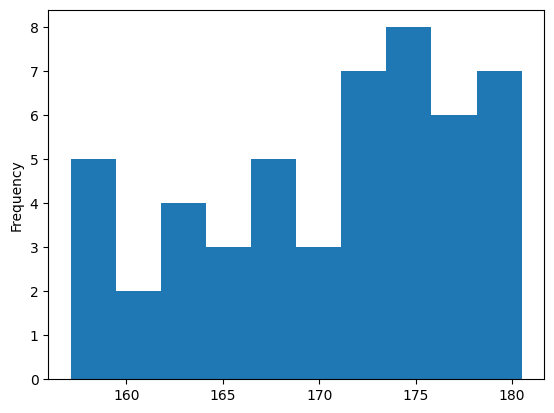

In [12]:
my_df['height'].plot.hist()

<Axes: ylabel='Density'>

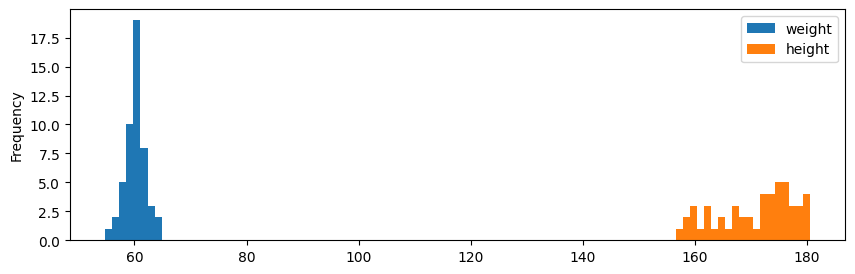

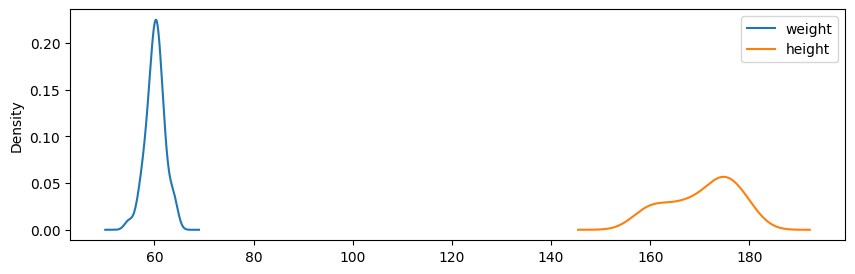

In [13]:
my_df[['weight','height']].plot.hist(bins=100,figsize=(10, 3)) # гистограммы
my_df[['weight','height']].plot.density(figsize=(10, 3))# ядерная оценка плотности распределения

### Визуализация категориальных данных с помощью фасетных сеток

Фасеты представляют собой множество графиков, каждый из которых отображает свою переменную или набор значений. Разбиение на фасеты проводится по значениям категориальных переменных.

В модуле `seaborn` имеется полезная функция `catplot()` ( в версиях до 0.9.0 - `factorplot()`), которая упрощает построение разнообразных фасетных графиков

In [14]:
#  по возможности обновите seaborn до последней версии
#%pip install --upgrade seaborn

In [15]:
import seaborn as sns
sns.__version__
#sns.catplot(data=my_df, x='weight', y='height', hue='smoker', kind='bar')

'0.13.2'

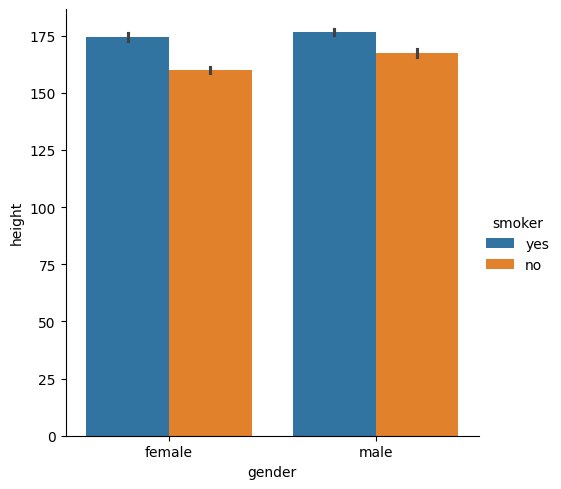

In [16]:
sns.catplot(data=my_df, x='gender', y='height',  kind='bar', hue='smoker')

Полезным с точки зрения изучения совместных распределений переменных являются **диаграммы размаха** (boxplots), которые также неформально называют **"ящиками с усами"**. Подробно о них по ссылке https://habr.com/ru/post/267123/

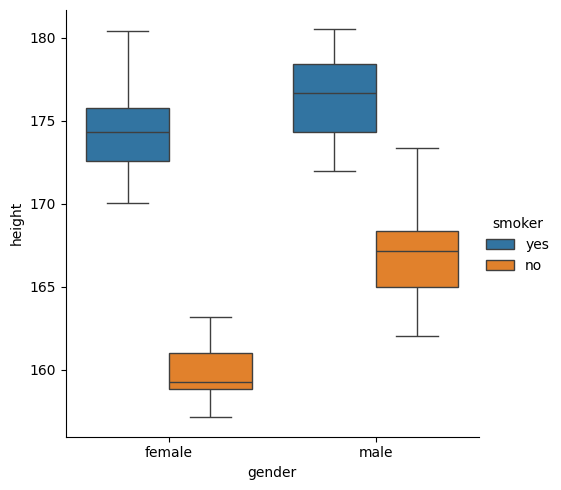

In [17]:
sns.catplot(data=my_df, x='gender', y='height',  kind='box', hue='smoker')

📌📌📌 **Задание:**

Продолжаем работать с набором данных о сердечно-сосудистых заболеваниях. Вам необходимо провести визуальный анализ данных и сделать из него предвариательные выводы о взаимосвязях между переменными, об особенностях их распределений, о возможных погрешностях сбора данных. Обратите внимание, что на графиках должны быть подписаны оси, выведено название графика, в случае необходимости - легенда.

**Вариант 1**: 
1. На одном рисунке постройте два отдельных графика - один должен демонстрировать взаимосвязь между систолическим давлением (`ap_hi`) и ростом, другой - систолическим давлением и весом. Есть ли связь между переменными? Наблюдаются ли выбросы в данных?
2. Подберите подходящий график и визуализируйте связь между потребленим алкоголя, курением и возрастом пацентов. Имеется ли связь? Если да, опишите ее устно.

**Вариант 2**: 
1. На одном рисунке постройте два отдельных графика - один должен демонстрировать взаимосвязь между возрастом (в годах) и ростом, другой - между возрастом (в годах) и весом. Есть ли связь между переменными? Наблюдаются ли выбросы в данных? (Замечание: для того, чтобы легче было отследить выбросы, регулируйте значения параметра прозрачности alpha)
2. На одном графике постройте гистограммы распределений систолического давления (`ap_hi`) отдельно для здоровых и страдающих ССЗ пациентов. Устно опишите результаты. 

**Вариант 3**: 
1. Постройте график зависимости между систолическим (`ap_hi`) и диастолическим давлением (`ap_lo`).Есть ли связь между переменными? Наблюдаются ли выбросы в данных?
2. Визуализируйте распределение уровня холестерина для различных возрастных категорий. Самостоятельо определите тип графика, с помощью которого это сделать

**Вариант 4**: Создайте новый признак `BMI` (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения BMI составляют от 18.5 до 25.
- постройте диаграмму рассеяния, по разным осям отложив значения систолического (`ap_hi`) и диастолического (`ap_lo`) давления. Разными цветами изобразите данные, соответствующие здоровым и страдающим ССЗ пациентам. Есть ли связь между переменными? Наблюдаются ли выбросы в данных?
- создайте визуализацию, позволяющую оценить распределение систолического давления (`ap_hi`) для разных уровней индекса массы тела, пола пациентов и наличия у них ССЗ (Замечания: неправдоподобные значения давления уберите из рассмотрения.)

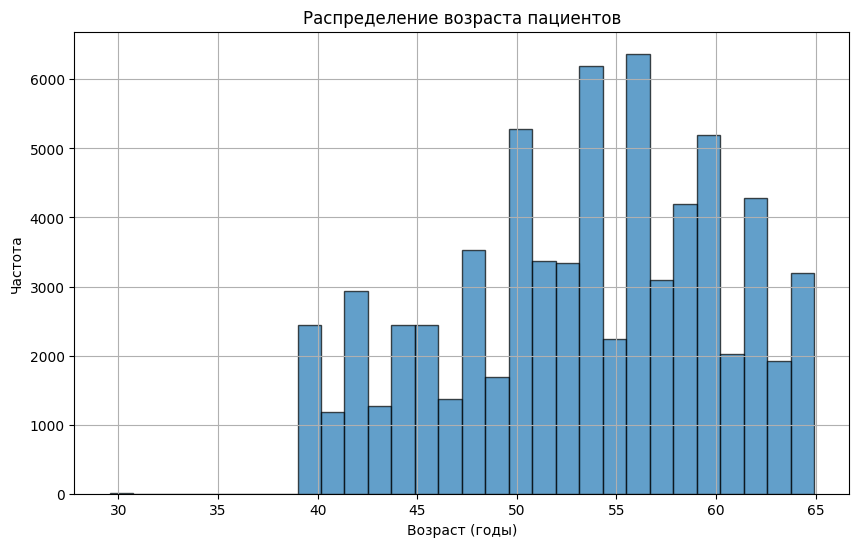

In [19]:
# Ваш код
df = pd.read_csv('cardio_train.csv', sep=';')
# Преобразуем возраст из дней в годы
df['age_years'] = df['age'] / 365.25

# Построим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df['age_years'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Возраст (годы)')
plt.ylabel('Частота')
plt.title('Распределение возраста пациентов')
plt.grid(True)
plt.show()